# Text and Annotation

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('memory-price.tsv', sep='\t')
data.head(3)

,dateDecimal,date,driveInfo,sizeInMb,sizeInGb,cost,dollarsPerGb,predictedDollarsPerGb,logCostPerGb,predictedLogCostPerGb
0,1980.00,1980 January,Morrow Designs,26,0.026,5000,193000,1974730.74,5.29,6.30
1,1980.50,1980 July,North Star,18,0.018,4199,233000,1480897.96,5.37,6.17
2,1981.67,1981 September,Apple,5,0.005,3500,700000,756656.41,5.85,5.88


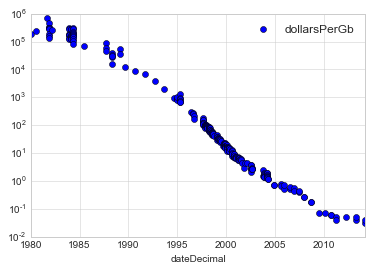

In [3]:
data.plot('dateDecimal', 'dollarsPerGb', logy=True,
          linestyle='none', marker='o');

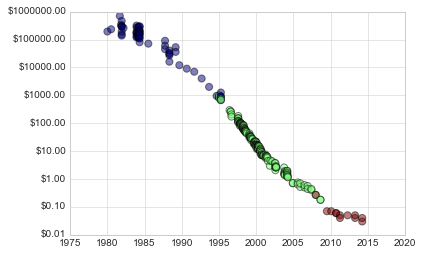

In [4]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.grid(True)

color = np.log10(data['sizeInGb']) // 3
color[np.isnan(color)] = -1  # missing data

ax.scatter(data['dateDecimal'], data['dollarsPerGb'],
           c=color, alpha=0.5, s=50, cmap='jet')
ax.yaxis.set_major_formatter(plt.FormatStrFormatter('$%.2f'));

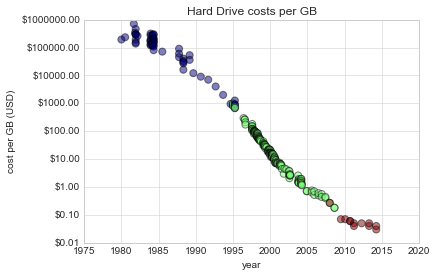

In [5]:
ax.set_xlabel('year')
ax.set_ylabel('cost per GB (USD)')
ax.set_title('Hard Drive costs per GB')
fig

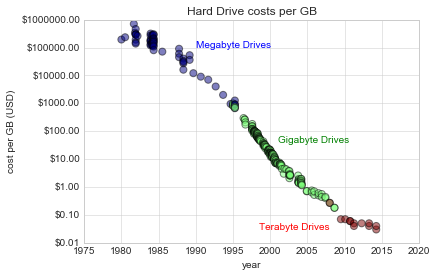

In [6]:
ax.text(1990, 1E5, 'Megabyte Drives', color='blue')
ax.text(2001, 40, 'Gigabyte Drives', color='green')
ax.text(2008, 0.03, 'Terabyte Drives', color='red', ha='right')
fig

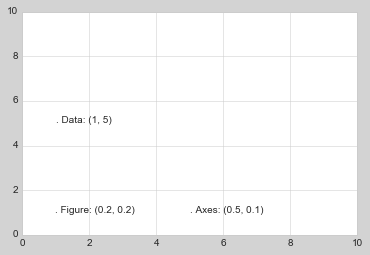

In [7]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData is the default, but we'll specify it anyway
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

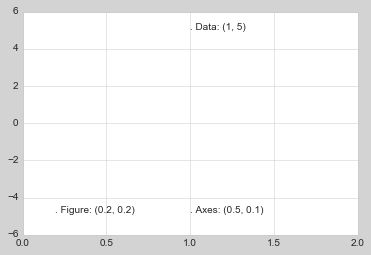

In [8]:
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

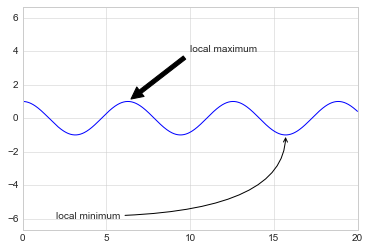

In [9]:
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

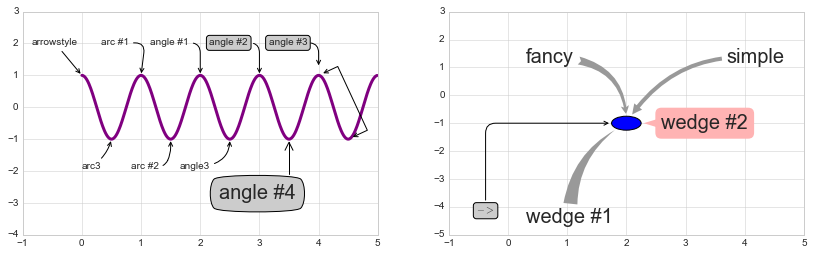

In [10]:
# Adapted from http://matplotlib.org/examples/pylab_examples/annotation_demo2.html
from matplotlib.patches import Ellipse

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# plot a line on the first axes
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax1.plot(t, s, lw=3, color='purple')
ax1.axis([-1, 5, -4, 3])

# add an ellipse to the second axes
el = Ellipse((2, -1), 0.5, 0.5)
ax2.add_patch(el)
ax2.axis([-1, 5, -5, 3])

# Now for some annotations
ax1.annotate('arrowstyle', xy=(0, 1),  xycoords='data',
             xytext=(-50, 30), textcoords='offset points',
             arrowprops=dict(arrowstyle="->"))

ax1.annotate('arc3', xy=(0.5, -1),  xycoords='data',
             xytext=(-30, -30), textcoords='offset points',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=.2"))

ax1.annotate('arc #1', xy=(1., 1),  xycoords='data',
             xytext=(-40, 30), textcoords='offset points',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc,angleA=0,armA=30,rad=10"))

ax1.annotate('arc #2', xy=(1.5, -1),  xycoords='data',
             xytext=(-40, -30), textcoords='offset points',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc,angleA=0,armA=20,angleB=-90,armB=15,rad=7"))

ax1.annotate('angle3', xy=(2.5, -1),  xycoords='data',
             xytext=(-50, -30), textcoords='offset points',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="angle3,angleA=0,angleB=-90"))

ax1.annotate('angle #1', xy=(2., 1),  xycoords='data',
             xytext=(-50, 30), textcoords='offset points',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="angle,angleA=0,angleB=90,rad=10"))

ax1.annotate('angle #2', xy=(3., 1),  xycoords='data',
             xytext=(-50, 30), textcoords='offset points',
             bbox=dict(boxstyle="round", fc="0.8"),
             arrowprops=dict(arrowstyle="->",
                                connectionstyle="angle,angleA=0,angleB=90,rad=10"))

ax1.annotate('angle #3', xy=(4., 1),  xycoords='data',
             xytext=(-50, 30), textcoords='offset points',
             bbox=dict(boxstyle="round", fc="0.8"),
             arrowprops=dict(arrowstyle="->",
                             shrinkA=0, shrinkB=10,
                             connectionstyle="angle,angleA=0,angleB=90,rad=10"))

ax1.annotate('angle #4', xy=(3.5, -1),  xycoords='data',
             xytext=(-70, -60), textcoords='offset points',
             size=20,
             bbox=dict(boxstyle="round4,pad=.5", fc="0.8"),
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="angle,angleA=0,angleB=-90,rad=10"))

ax1.annotate('', xy=(4., 1.),  xycoords='data',
             xytext=(4.5, -1), textcoords='data',
             arrowprops=dict(arrowstyle="<->",
                             connectionstyle="bar",
                             ec="k",
                             shrinkA=5, shrinkB=5))

ax2.annotate('$->$', xy=(2., -1),  xycoords='data',
             xytext=(-150, -90), textcoords='offset points',
             bbox=dict(boxstyle="round", fc="0.8"),
             arrowprops=dict(arrowstyle="->",
                             patchB=el,
                             connectionstyle="angle,angleA=90,angleB=0,rad=10"))

ax2.annotate('fancy', xy=(2., -1),  xycoords='data',
             xytext=(-100, 60), textcoords='offset points',
             size=20,
             arrowprops=dict(arrowstyle="fancy",
                             fc="0.6", ec="none",
                             patchB=el,
                             connectionstyle="angle3,angleA=0,angleB=-90"))

ax2.annotate('simple', xy=(2., -1),  xycoords='data',
             xytext=(100, 60), textcoords='offset points',
             size=20,
             arrowprops=dict(arrowstyle="simple",
                             fc="0.6", ec="none",
                             patchB=el,
                             connectionstyle="arc3,rad=0.3"))

ax2.annotate('wedge #1', xy=(2., -1),  xycoords='data',
             xytext=(-100, -100), textcoords='offset points',
             size=20,
             arrowprops=dict(arrowstyle="wedge,tail_width=0.7",
                             fc="0.6", ec="none",
                             patchB=el,
                             connectionstyle="arc3,rad=-0.3"))

ax2.annotate('wedge #2', xy=(2., -1),  xycoords='data',
             xytext=(35, 0), textcoords='offset points',
             size=20, va="center",
             bbox=dict(boxstyle="round", fc=(1.0, 0.7, 0.7), ec="none"),
             arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                             fc=(1.0, 0.7, 0.7), ec="none",
                             patchA=None,
                             patchB=el,
                             relpos=(0.2, 0.5)));